# Kelly position size is optimal capital allocation algorithm

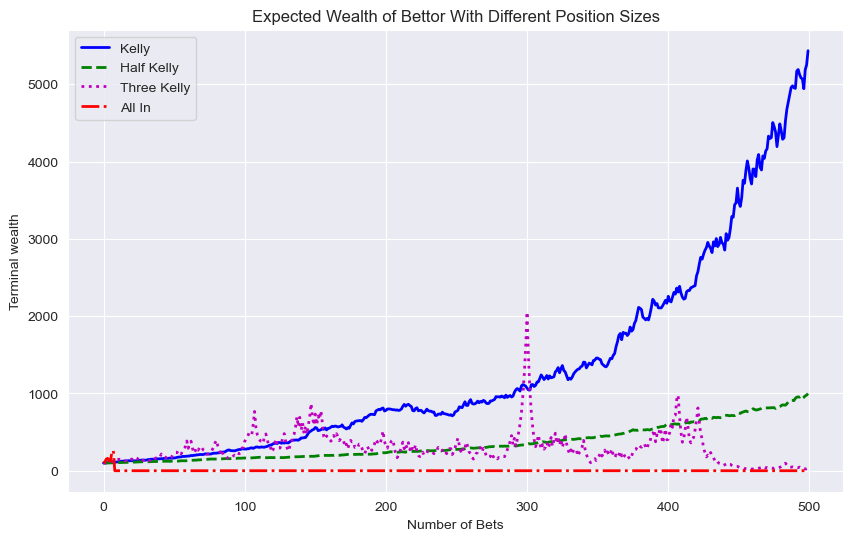

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(101)

# Weighted coin in your favor
p = 0.55

# The Kelly position size (edge/odds) for odds 1:1
f_star = p - (1 - p)

# Number of series in Monte Carlo simulation
n_series = 50

# Number of trials per series
n_trials = 500

def run_simulation(f):
#Runs a Monte Carlo simulation of a betting strategy with the given Kelly fraction.
#Takes f, The Kelly fraction, as the argument and returns a NumPy array of the terminal wealths of the simulation.

    # Array for storing results
    c = np.zeros((n_trials, n_series))

    # Initial capital of $100
    c[0] = 100

    for i in range(n_series):
        for t in range(1, n_trials):
            # Use binomial random variable because we are tossing a weighted coin
            outcome = np.random.binomial(1, p)

            # If we win, we add the Kelly fraction to our accumulated capital
            if outcome > 0:
                c[t, i] = (1 + f) * c[t - 1, i]

            # If we lose, we subtract the Kelly fraction from our accumulated capital
            else:
                c[t, i] = (1 - f) * c[t - 1, i]

    return c

# Run simulations for different position sizes
# The Kelly position size is our optimal betting size
c_kelly = run_simulation(f_star)

# Half Kelly size reduces the volatility while keeping the gains
c_half_kelly = run_simulation(f_star / 2)

# Anything more than twice Kelly leads to ruin in the long run
c_3_kelly = run_simulation(f_star * 3)

# Betting all your capital leads to ruin very quickly
c_all_in = run_simulation(1)

# Plot the expected value/arithmetic mean of terminal wealth over all the iterations of 500 trials each
fig, ax = plt.subplots(figsize=(10, 6))

# Overlay multiple plots with different line styles and markers
ax.plot(c_kelly.mean(axis=1), 'b-', lw=2, label='Kelly')
ax.plot(c_half_kelly.mean(axis=1), 'g--', lw=2, label='Half Kelly')
ax.plot(c_3_kelly.mean(axis=1), 'm:', lw=2, label='Three Kelly')
ax.plot(c_all_in.mean(axis=1), 'r-.', lw=2, label='All In')

ax.legend(loc=0)
ax.set_title('Expected Wealth of Bettor With Different Position Sizes')
ax.set_ylabel('Terminal wealth')
ax.set_xlabel('Number of Bets')

plt.show()